In [1]:
!pip install yfinance
!pip install fitter
!pip install distfit

!pip install pandas_ta
!pip install yfinance
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import numpy as np
import scipy.stats as stats
import sys
from distfit import distfit


!{sys.executable} -m pip install scipy

from fitter import Fitter
stock=['AAPL',"GE",'AMZN',"DIS","T","PG","PFE","MRK","WFC","FB","NVDA","NFLX","BAC","DD","SPY"]
array=[]
for i in stock:
    df = yf.download(i, start='2016-01-01', end = '2022-07-31', progress=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 4.5 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=6742edd7660edc3873bd6052bf146660a7f03a7571a7a36d4bbce61b4c9b72ea
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=d5ef7b9534df099e8ee5282cd5201c3108fe78b1ed6b526f28ecdcdaa88f6654
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successful

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
stock=['AAPL',"GE",'AMZN',"DIS","T","PG","PFE","MRK","WFC","FB","NVDA","NFLX","BAC","DD","SPY"]
df = yf.download('AAPL', start='2017-01-01',end = '2022-07-31',progress=False)
df.reset_index(inplace=True)
df=df.groupby(df['Date'].dt.year)['Adj Close'].agg(['first'])
df=df.pct_change()

for i in stock:
    print(i)
    df2 = yf.download(i, start='2016-01-01',end = '2022-07-31', progress=False)
    df2.reset_index(inplace=True)
    df2=df2.groupby(df2['Date'].dt.year)['Adj Close'].first()
    df2=df2.pct_change()
    df=df.merge(df2,on='Date',suffixes=('','_'+i))
    print(df2)
df.to_csv('return.csv')

AAPL
Date
2016         NaN
2017    0.127045
2018    0.506931
2019   -0.069483
2020    0.930488
2021    0.738340
2022    0.415131
Name: Adj Close, dtype: float64
GE
Date
2016         NaN
2017    0.064181
2018   -0.413495
2019   -0.539595
2020    0.547456
2021   -0.117927
2022    0.152623
Name: Adj Close, dtype: float64
AMZN
Date
2016         NaN
2017    0.183174
2018    0.577627
2019    0.294463
2020    0.233171
2021    0.678932
2022    0.069497
Name: Adj Close, dtype: float64
DIS
Date
2016         NaN
2017    0.045582
2018    0.070303
2019   -0.009857
2020    0.376628
2021    0.198920
2022   -0.117740
Name: Adj Close, dtype: float64
T
Date
2016         NaN
2017    0.337471
2018   -0.044161
2019   -0.172771
2020    0.426470
2021   -0.172840
2022   -0.049729
Name: Adj Close, dtype: float64
PG
Date
2016         NaN
2017    0.109697
2018    0.110282
2019    0.042439
2020    0.390017
2021    0.144347
2022    0.211706
Name: Adj Close, dtype: float64
PFE
Date
2016         NaN
2017    0.071926

In [3]:
from google.colab import files
files.download('return.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f620be6f5d0>,
      dtype=object)

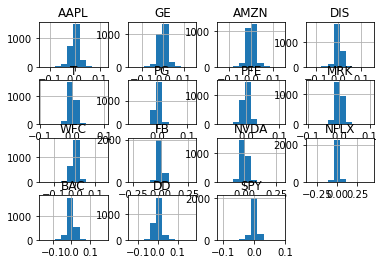

In [10]:
returns = pd.read_csv(r'/content/drive/MyDrive/DS4A Project/return_with_spy.csv')
returns.hist()